# Simple linear regression

We have a dataset from the university of Florida: http://www.stat.ufl.edu/~winner/datasets.html
Specifically the brain_data: http://www.stat.ufl.edu/~winner/data/brainhead.dat
Using brain weight (grams) we will predict head size (cubic cm).

1. We first clean the data
2. Create a test and validation set
3. We will make a linear model and fit it using SGD

We assume the dataset is downloaded in de current working directory and is named 'brainhead.dat'

In [103]:
import numpy
import matplotlib.pyplot as plt

In [104]:
# extract data
file_name = 'brainhead.dat'
with open(file_name, 'r') as f:
    raw_data = f.readlines()

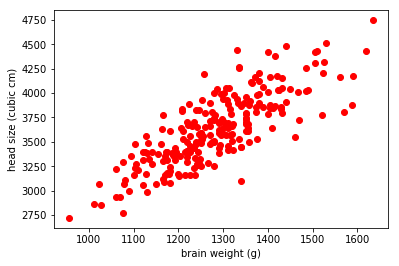

In [108]:
# convert data to x (brain weight) and y (head size) values
data_x = []
data_y = []

for line in raw_data:
    line_data = ' '.join(line.split()).split()
    data_x.append(float(line_data[3]))
    data_y.append(float(line_data[2]))

    
fig, ax = plt.subplots(1)

# Make your plot, set your axes labels
ax.plot(data_x, data_y, 'ro')
ax.set_xlabel('brain weight (g)')
ax.set_ylabel('head size (cubic cm)')

plt.show()

In [109]:
# split in test and train dataset 80% train 20% test
# I later realised this was pretty useless for a linear model but it is oke.
number_to_train = round(0.8 * len(data_x))

data_train_x = data_x[:number_to_train]
data_train_y = data_y[:number_to_train]

data_test_x = data_x[number_to_train:]
data_test_y = data_y[number_to_train:]

## Training

We have the data, it isn't normalized or anything but I think it is fine.
We have four parameters to predict the price.

After 1000 steps the following was found: 
Weight: 2.8334044731213566
Bias: 0.007562775830339254


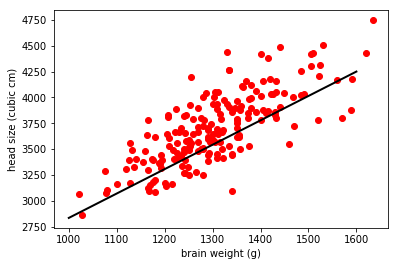

In [221]:
learning_rate = 0.0000005 # this learning rate is a bit weird, probably because we didn't normalize the data
steps = 1000

def sgd(data_x, data_y, epochs=100, l_rate=0.0001):
    w1 = 0
    b1 = 0
    
    len_data = len(data_x)

    for epoch in range(epochs):
        w_temp = 0
        b_temp = 0
        for i in range(len_data):
            error = (data_y[i] - w1 * data_x[i] - b1)
            w_temp += -2*(data_x[i]*error) / len_data
            b_temp += -2*(error) / len_data
    
        w1 -= l_rate*w_temp
        b1 -= l_rate*b_temp
    return (w1, b1)

weight, bias = sgd(data_train_x, data_train_y, steps, learning_rate)

print("After {} steps the following was found: ".format(steps))
print("Weight: {}".format(weight))
print("Bias: {}".format(bias))

points_x = [1000, 1600]
points_y = [weight*1000+bias, weight*1500+bias]

# Make your plot, set your axes labels
plt.plot(data_train_x, data_train_y, 'ro')
plt.plot(points_x, points_y, 'k-', lw=2)
plt.xlabel('brain weight (g)')
plt.ylabel('head size (cubic cm)')

plt.show()

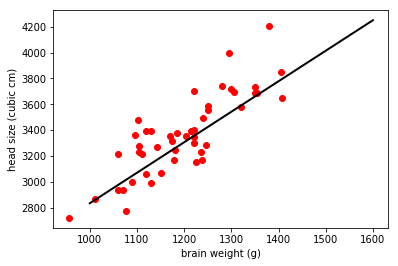

In [222]:
# with test dataset
points_x = [1000, 1600]
points_y = [weight*1000+bias, weight*1500+bias]

# Make your plot, set your axes labels
plt.plot(data_test_x, data_test_y, 'ro')
plt.plot(points_x, points_y, 'k-', lw=2)
plt.xlabel('brain weight (g)')
plt.ylabel('head size (cubic cm)')

plt.show()

Well, this seems fine. 

Just to be complete we will create a cost function and test the test data. We allready used 2 partial derivatives for the gradient descent.

In [228]:
def cost(data_x, data_y, w, b):
    cost = 0
    len_data = len(data_x)
    for i in range(len(data_x)):
        cost += numpy.square(data_y[i] - (w*data_x[i] + b))
    return cost/len_data

print(cost(data_test_x, data_test_y, weight, bias))

31169.967919805444
